<h1 align="center" style="color:orange;"> Data visualization </h1>

> The `iris` dataset is considered as the _hello world_ in data science. It is a small dataset that contains 150 observations of 3 different species of iris flowers. The 4 features identify the flower species based on the length and width of the sepals and petals. The objective is to classify the species based on the features. We will use this dataset to demonstrate the use of different data visualization techniques.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Data/Iris.csv')

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**Observations**

- There are 150 rows and 6 columns in the dataset (4 features and  1 target variable).

- The id column is not required for the analysis.

In [3]:
# col names
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
# How many data-points in each class ?
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

**Observations**

- We can say this is a balanced dataset as the number of observations for each class is the same.

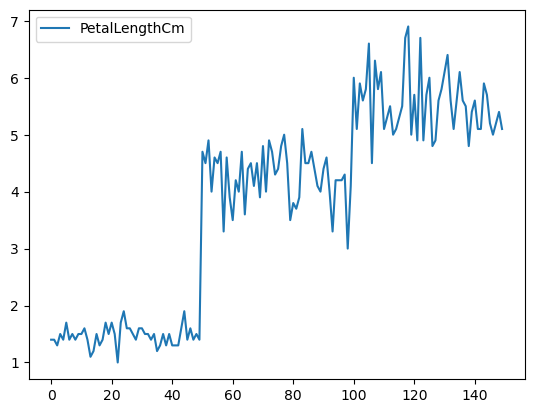

In [3]:
#1D - line plot
df.plot(kind='line', y='PetalLengthCm')
plt.show()

**Observations**

- This clearly shows that; 1D plotting is pretty useless in this case. We can't distinguish the classes based on any of the features alone. But it kind of roughly outlines the distribution of the data.

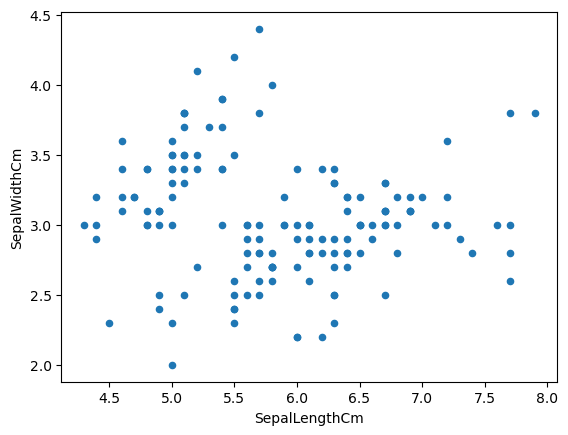

In [5]:
# 2D scatter plot using pandas 
df.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


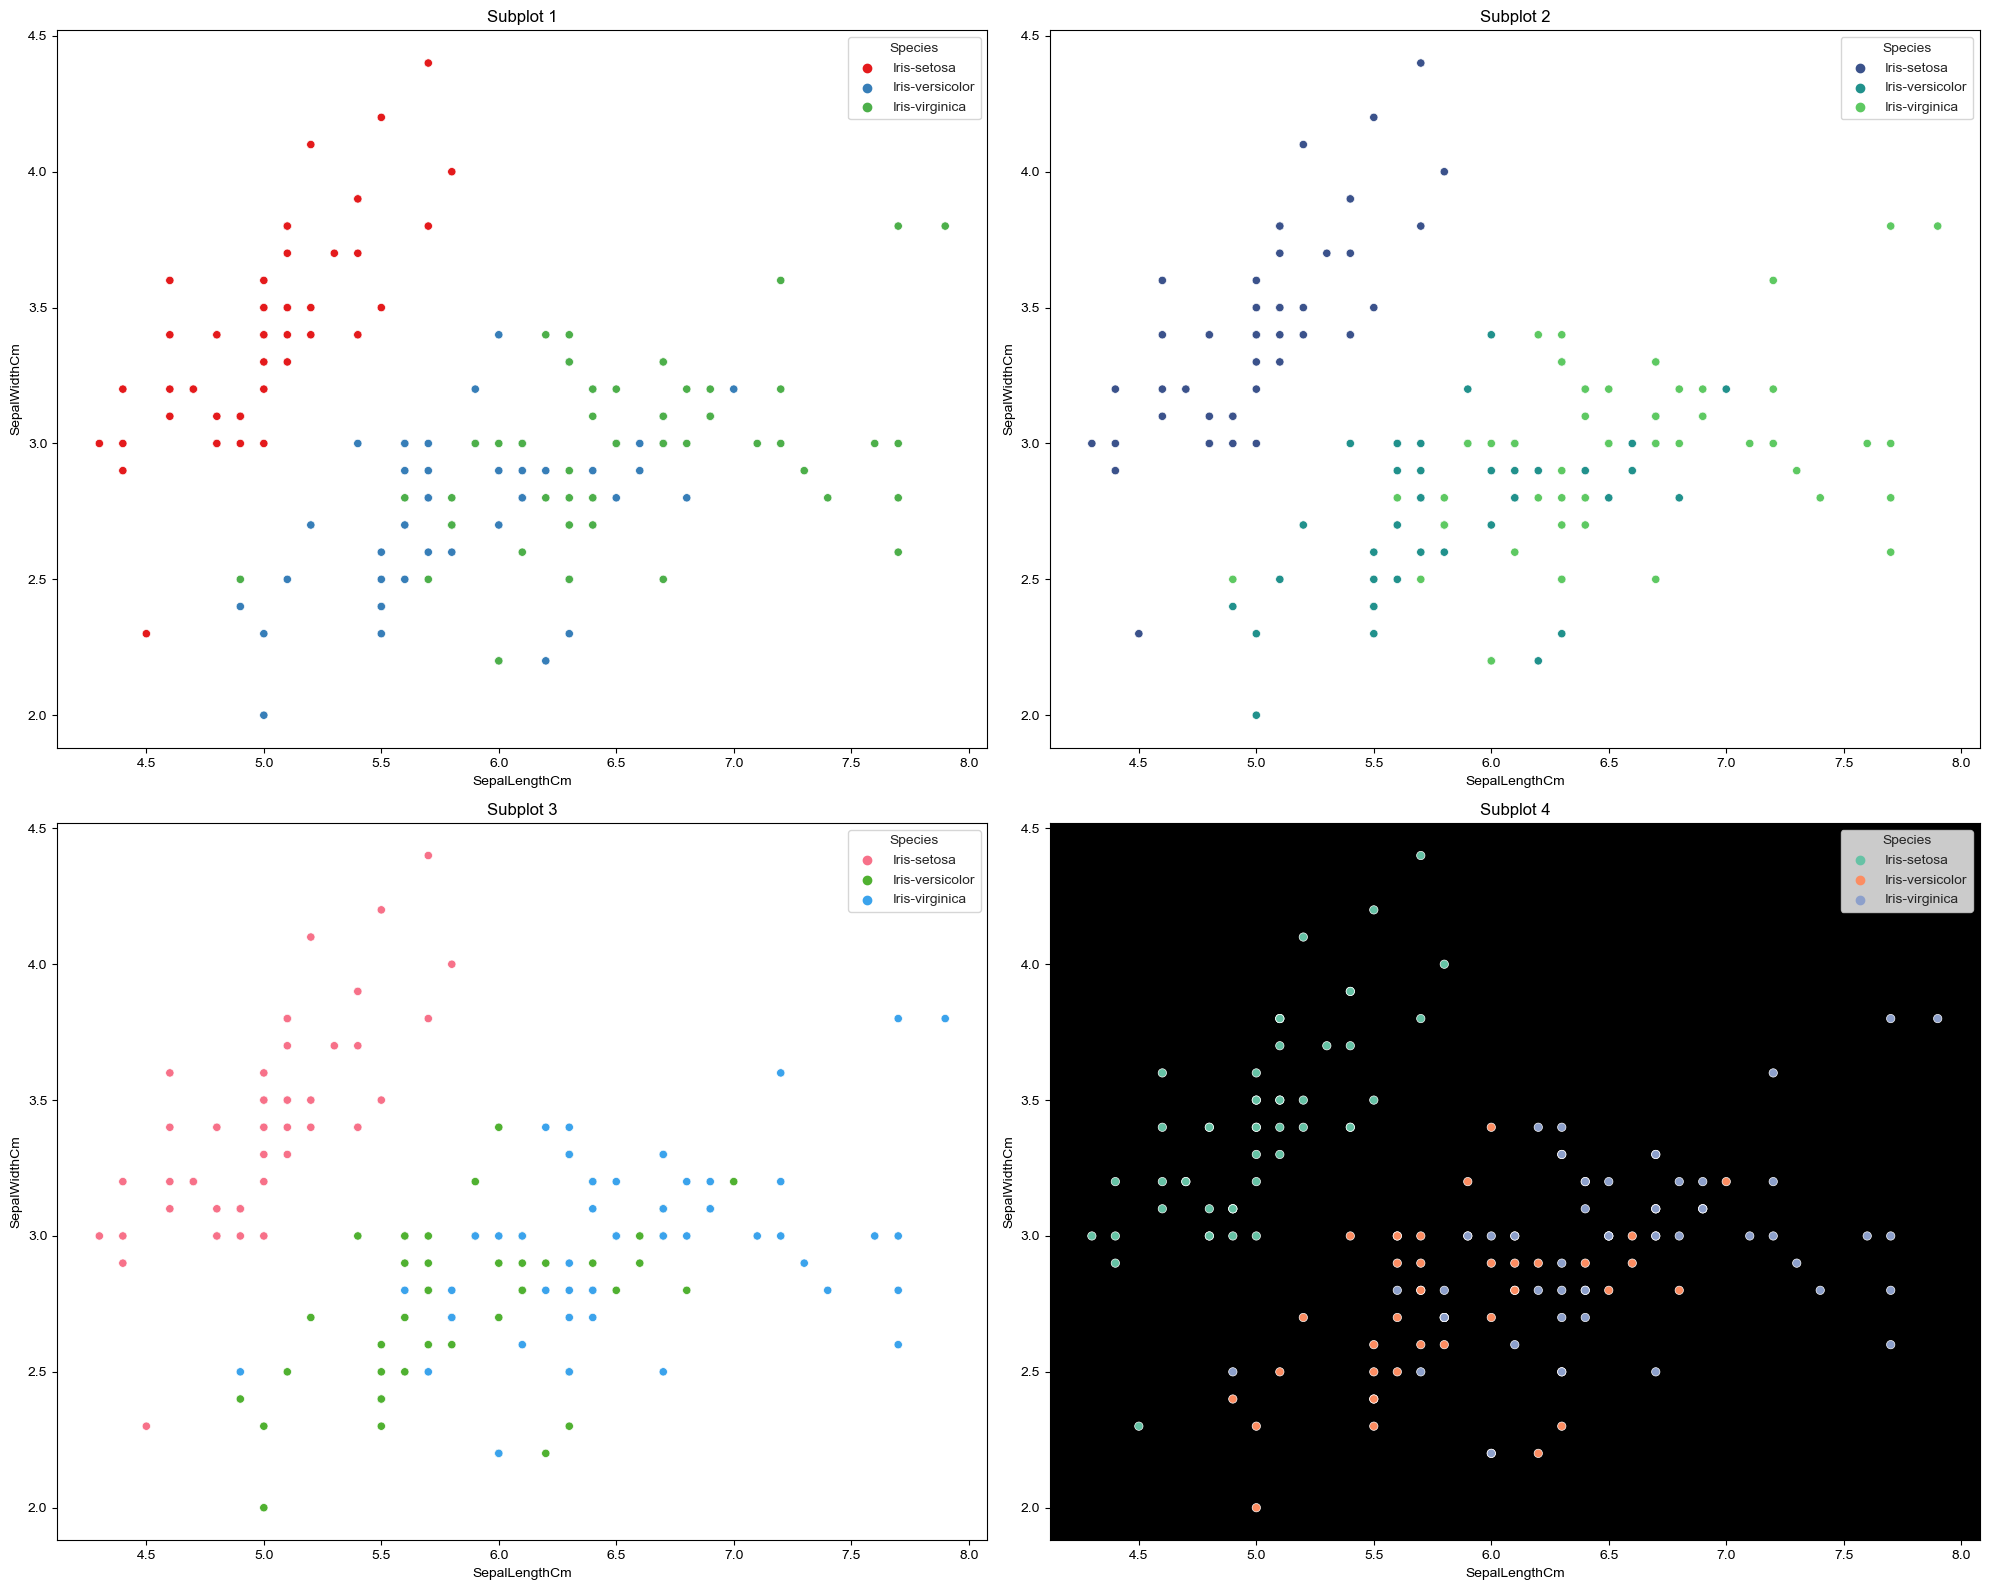

In [6]:
# setting a 2 X 2 grid and the fig size
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
sns.set_style('whitegrid')

# Plot on the first subplot
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='Set1', ax=axes[0, 0])
plt.legend(title='Species')
axes[0, 0].set_title('Subplot 1')

# Plot on the second subplot
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='viridis', ax=axes[0, 1])
plt.legend(title='Species')
axes[0, 1].set_title('Subplot 2')

# Plot on the third subplot
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='husl',  ax=axes[1, 0])
plt.legend(title='Species')
axes[1, 0].set_title('Subplot 3')

# Plot on the fourth subplot
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='Set2',  ax=axes[1, 1])
plt.legend(title='Species')
# changing background to black
axes[1, 1].set_facecolor('black')
axes[1, 1].set_title('Subplot 4')

# Adjust layout
plt.tight_layout()
plt.show()

**Observations**

- Based on sepal length and sepal width, setosa is easily separable from the other two species (linearly separable). Versicolor and virginica are not linearly separable based on these two features.

In [5]:
# 3D plots

import plotly.express as px

fig = px.scatter_3d(df, x='SepalLengthCm', y='SepalWidthCm', z='PetalLengthCm', color='Species', symbol='Species')

fig.update_traces(marker=dict(size=4),
                  selector=dict(mode='markers'))

# Add labels to the axes (optional)
fig.update_layout(scene=dict(xaxis_title='Sepal Length',
                             yaxis_title='Sepal Width',
                             zaxis_title='Petal Length'))

fig.show()

**Observations**

- When we used one more feature we were able to separate the versicolor and virginica species. We may use a plane for that. Although 3D plots are good for understanding the data, they are not used unless it is necessary due to its limitations in presenting the data.

c:\Users\kanna\.conda\envs\ML\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\kanna\AppData\Local\Temp\ipykernel_20268\3753530287.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


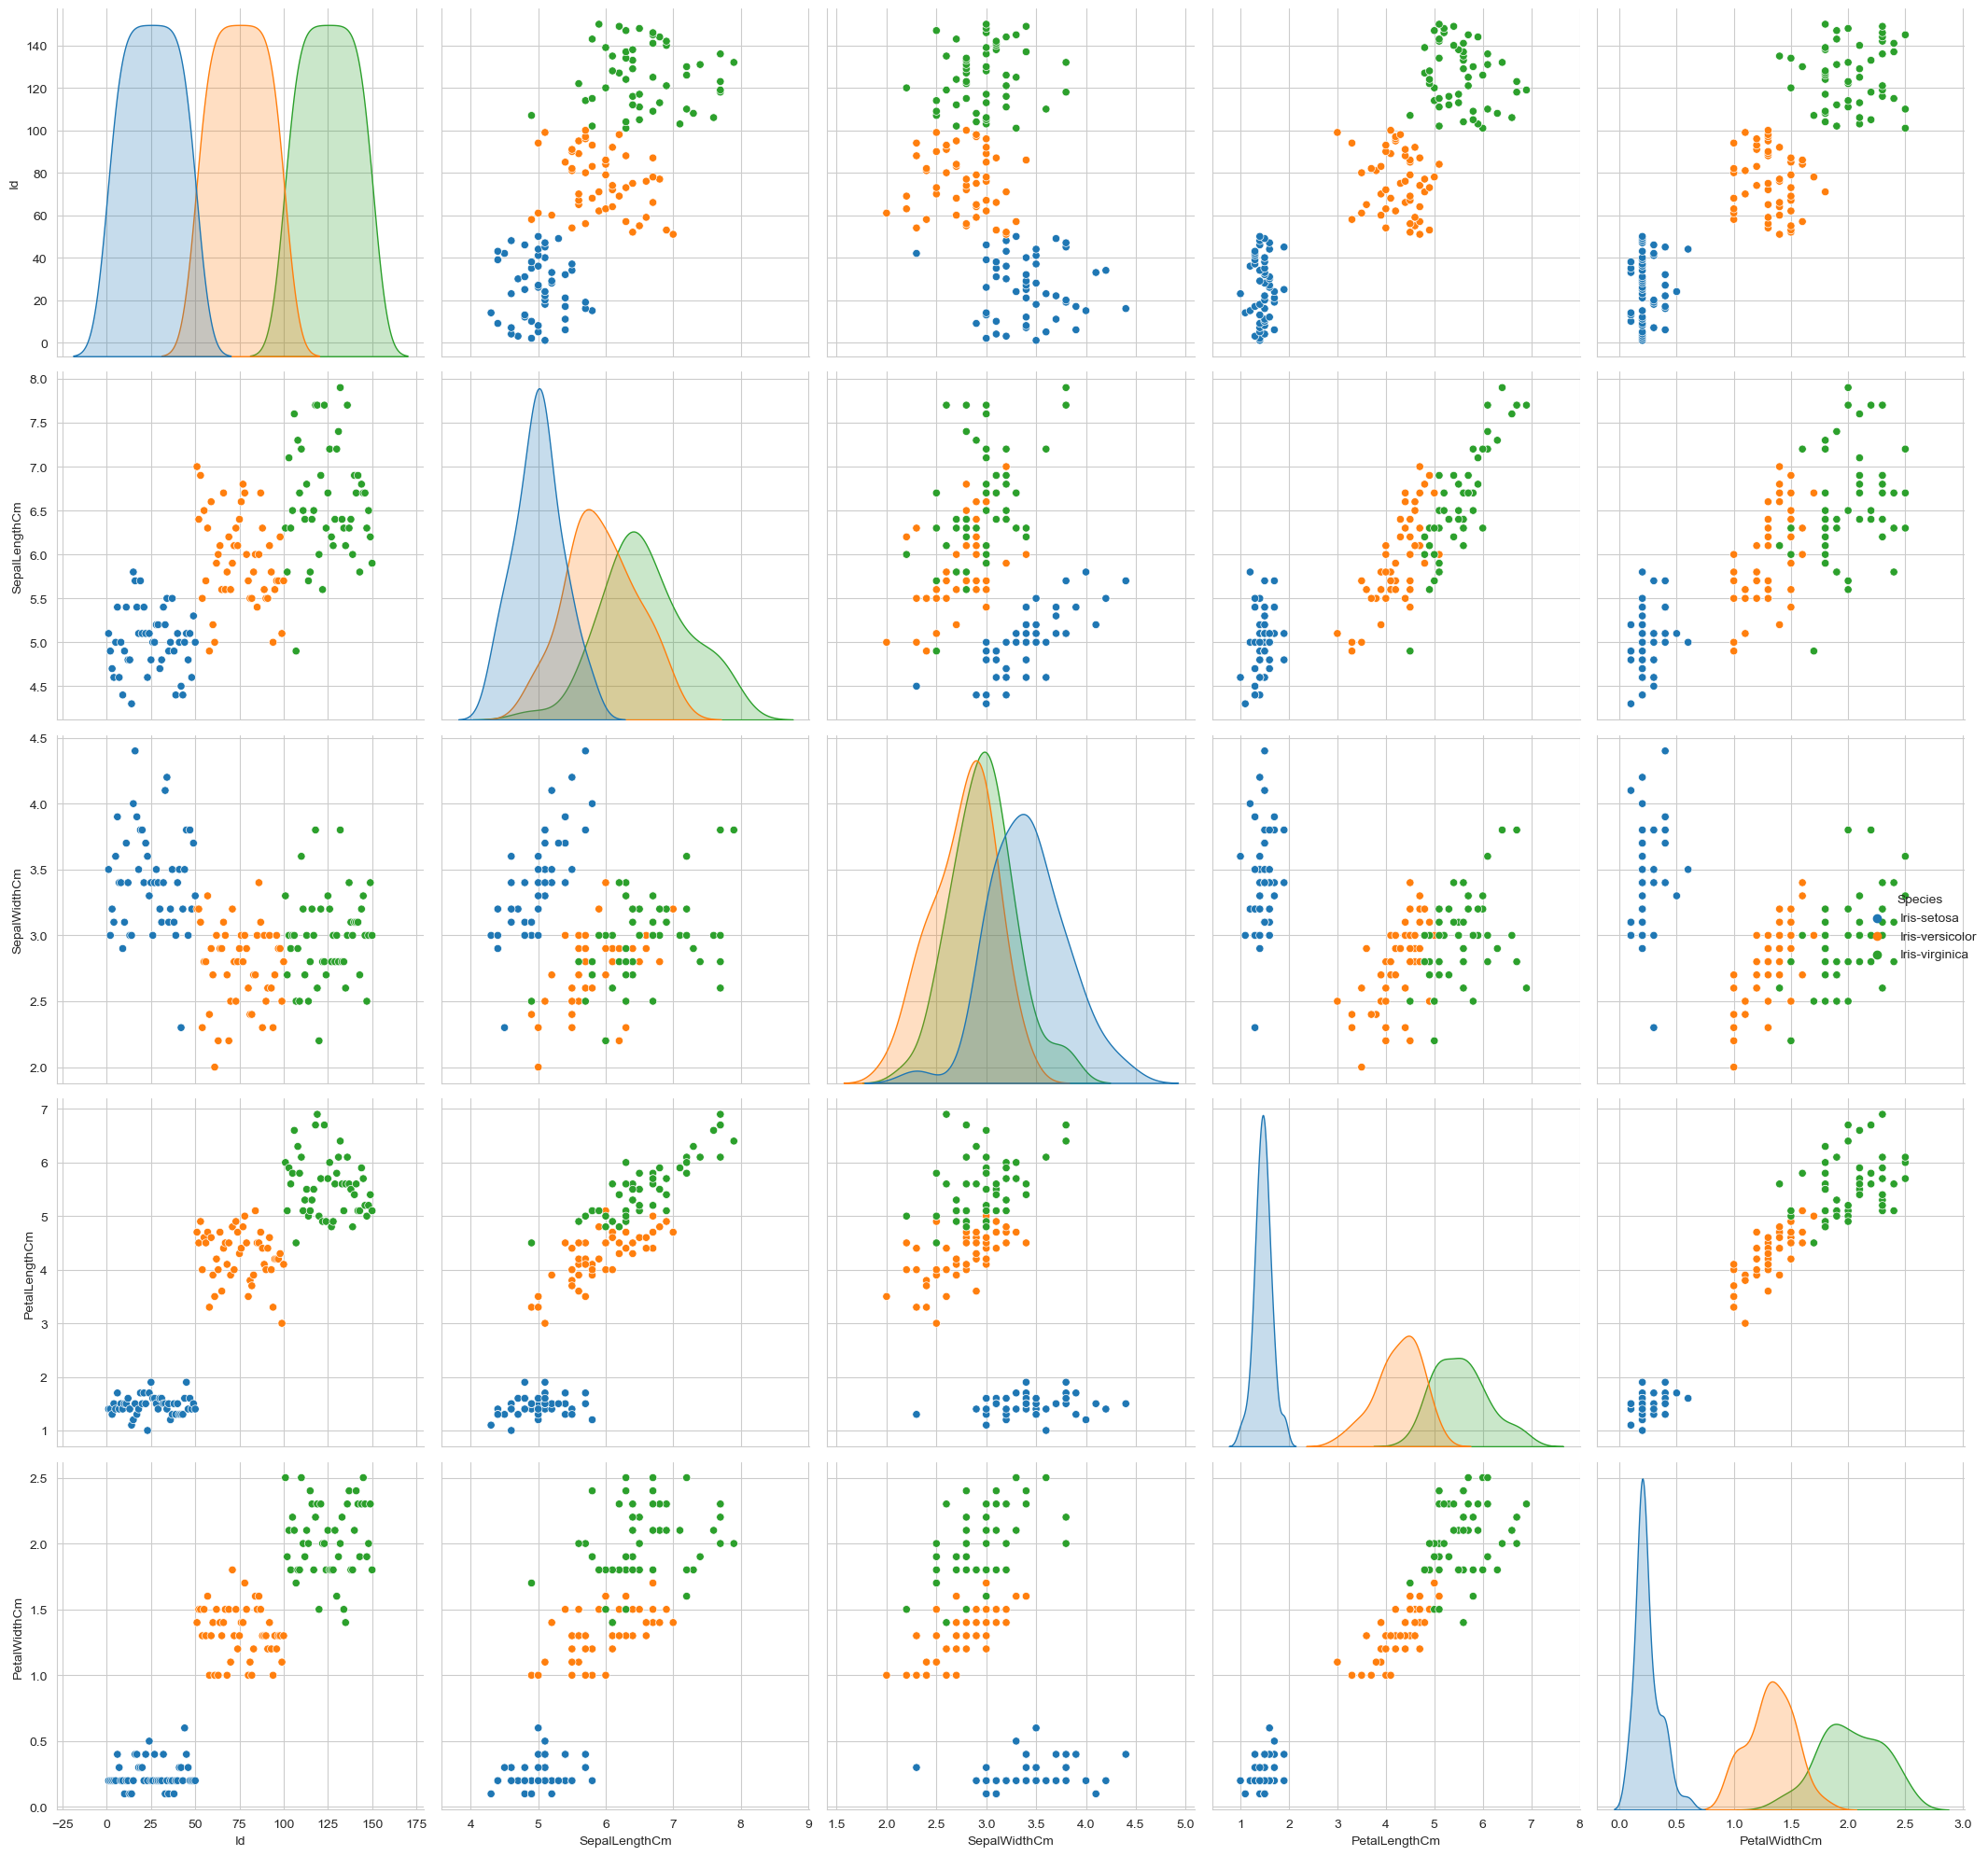

In [4]:
# pair plot
sns.set_style('whitegrid')
sns.pairplot(df, hue='Species', height=4)

plt.tight_layout()
plt.show()

### [Seaborn pairplot documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

**Observations**

- Petal length and petal width are the most useful features to identify various flower types.

- At this point, we can easily separate setosa from the other two. But versicolor and virginica are still overlapping.

c:\Users\kanna\.conda\envs\ML\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


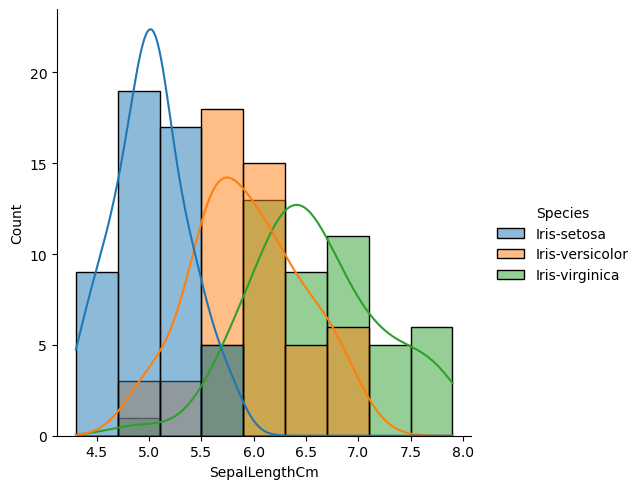

In [18]:
sns.displot(df, x='SepalLengthCm', hue='Species', kde=True)
plt.show()

**Observations**

- This `displot` gives us an idea about the count of each species and at the same time, it shows the distribution of the data.

### [seaborn displot documentation](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn-displot)

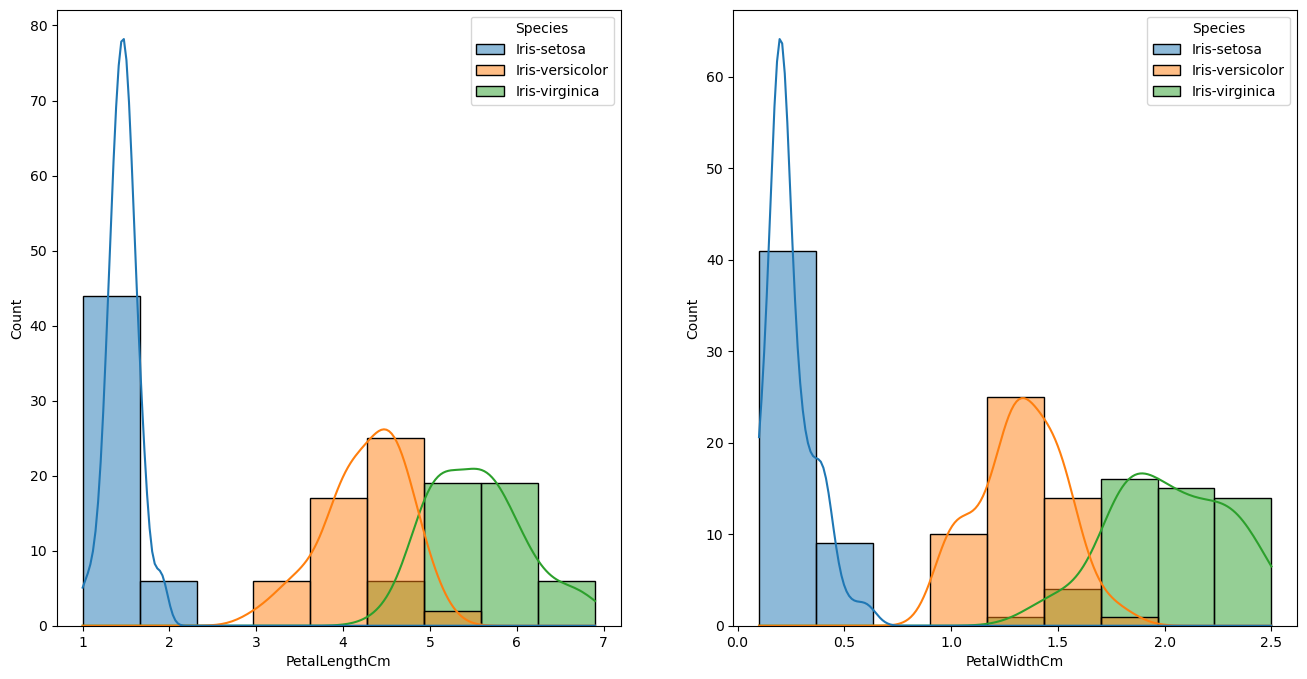

In [17]:
_, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.histplot(df, x='PetalLengthCm', hue='Species', kde=True, ax=axes[0])
sns.histplot(df, x='PetalWidthCm', hue='Species', kde=True, ax=axes[1])

plt.show()

**Observations**

- The histogram along with the `PDF` shows that out of petal length and petal width petal length is a better feature to identify the flower species.

- $P_l > P_w $

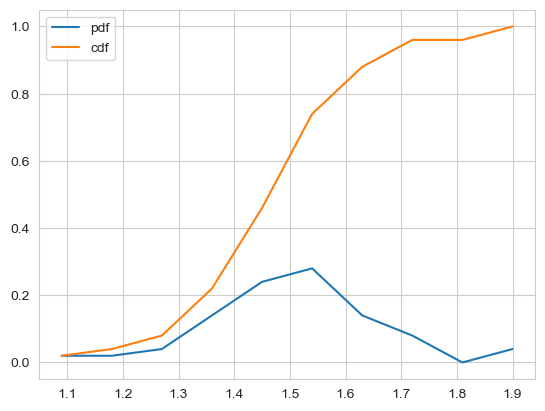

In [6]:
setosa_df = df[df['Species'] == 'Iris-setosa']
count, bin_edges = np.histogram(setosa_df['PetalLengthCm'], bins=10, density=True)

pdf = count / sum(count)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='pdf')
plt.plot(bin_edges[1:], cdf, label='cdf')
plt.legend()
plt.show()

- This is the pdf and cdf of petal length of setosa species.

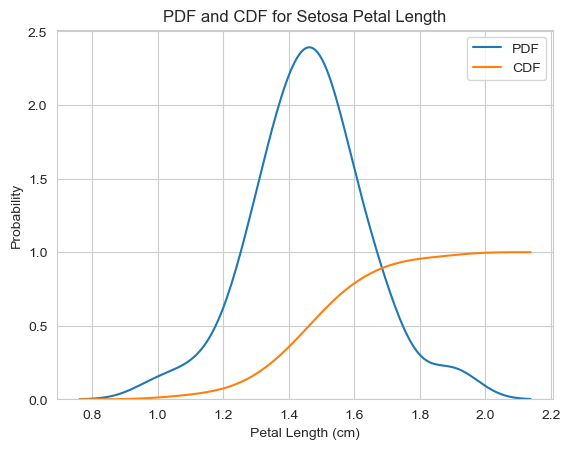

In [32]:
# Plot PDF and CDF for setosa species using Seaborn
sns.kdeplot(setosa_df['PetalLengthCm'], label='PDF', cumulative=False)
sns.kdeplot(setosa_df['PetalLengthCm'], label='CDF', cumulative=True)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Probability')
plt.title('PDF and CDF for Setosa Petal Length')
plt.legend()
plt.show()

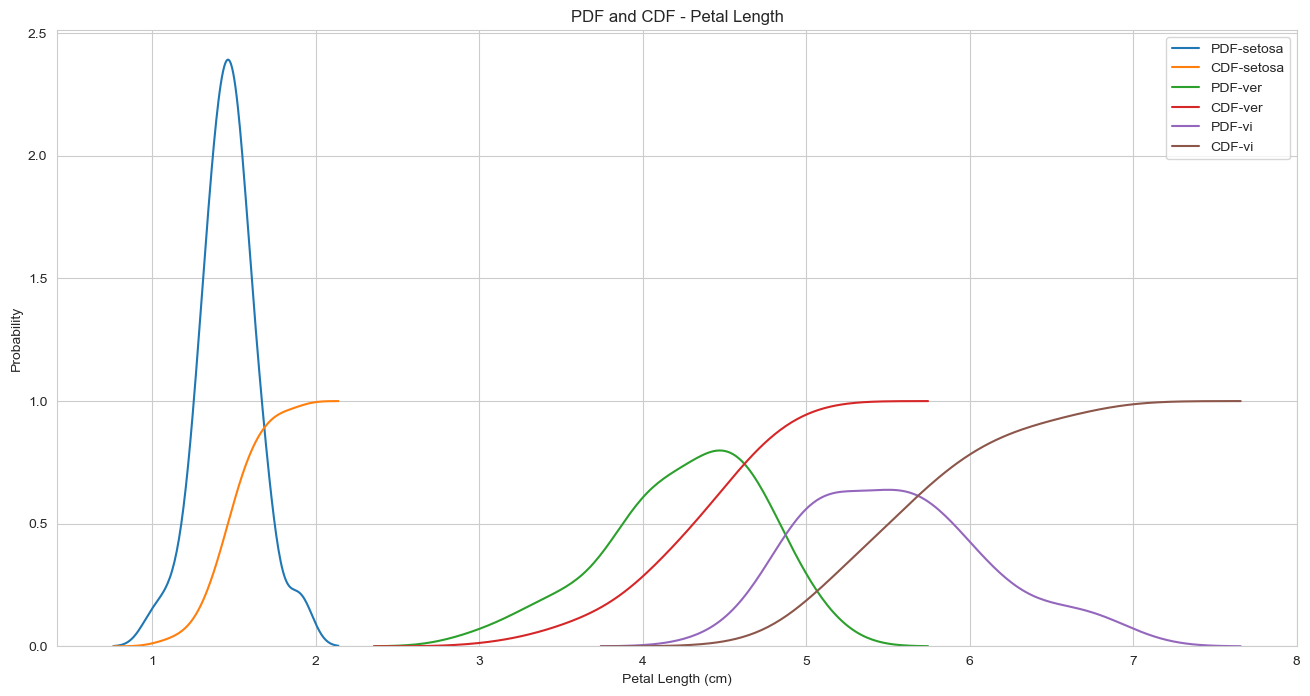

In [7]:
# plotting pdf-cdf of all(petal length)
fig, _ = plt.subplots(figsize=(16, 8))
vi_df = df[df['Species'] == 'Iris-virginica']
ver_df = df[df['Species'] == 'Iris-versicolor']

sns.kdeplot(setosa_df['PetalLengthCm'], label='PDF-setosa', cumulative=False)
sns.kdeplot(setosa_df['PetalLengthCm'], label='CDF-setosa', cumulative=True)

sns.kdeplot(ver_df['PetalLengthCm'], label='PDF-ver', cumulative=False)
sns.kdeplot(ver_df['PetalLengthCm'], label='CDF-ver', cumulative=True)

sns.kdeplot(vi_df['PetalLengthCm'], label='PDF-vi', cumulative=False)
sns.kdeplot(vi_df['PetalLengthCm'], label='CDF-vi', cumulative=True)


plt.xlabel('Petal Length (cm)')
plt.ylabel('Probability')
plt.title('PDF and CDF - Petal Length')
plt.legend()
plt.show()

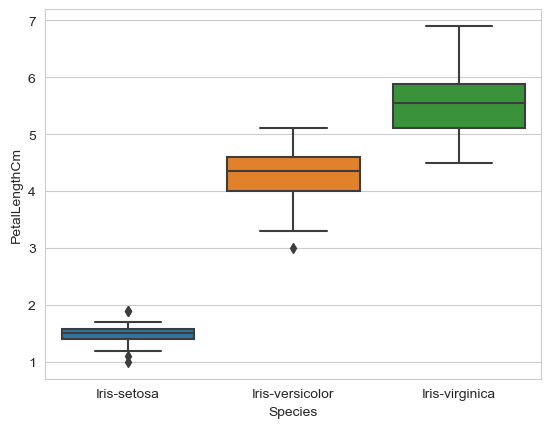

In [5]:
# box and whisker plots
sns.set_style('whitegrid')
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.show()

**Observations**

- The boxplot gives much more information than the other plots. 

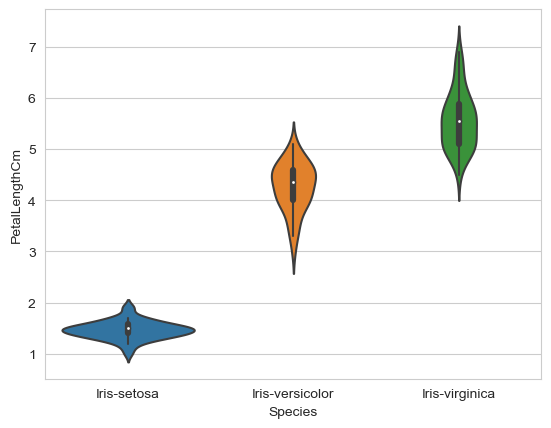

In [8]:
# violin plot

sns.violinplot(x='Species', y='PetalLengthCm', data=df, size=7)
plt.show()

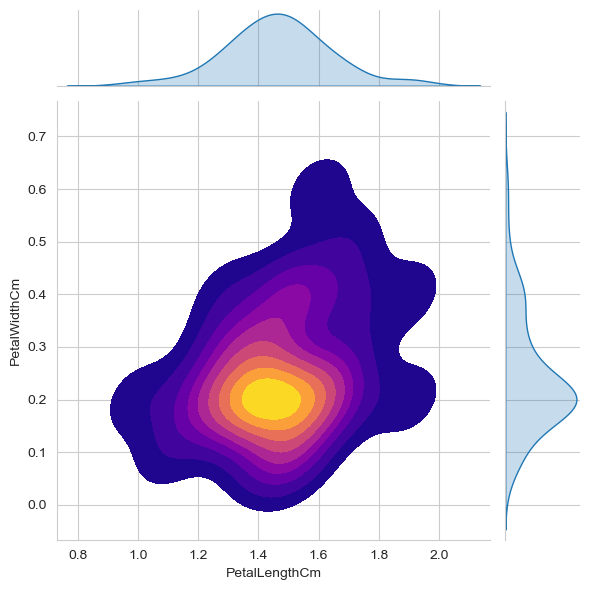

In [19]:
# contour plot
sns.jointplot(x='PetalLengthCm', y='PetalWidthCm', data=setosa_df, kind='kde', fill=True, cmap='plasma')
plt.show()